## Importing the Dataset

In [3]:
import pandas as pd

tiles = pd.read_csv("tile_placements.csv")

In [5]:
tiles.head()

,ts,user,x_coordinate,y_coordinate,color
0,1491167838000,c2Md9m4QckH8M+lhNh9btgoiFDk=,326,258,0
1,1491171651000,5KjCuLCk/VTXBIgaszopYecZ3uU=,190,791,0
2,1491105072000,toyjOAoAZMtlGZ3hXm5/LYsi+iA=,1,753,0
3,1491235861000,TGENUMJ6VmaBRr8ae9yP0MWQ66g=,233,931,0
4,1491163179000,usR8PLvN90gdivTbszEqhvPcXI4=,526,663,0


## Remove unnecessary column

In [6]:
del tiles["user"]

In [7]:
tiles.columns

Index(['ts', 'x_coordinate', 'y_coordinate', 'color'], dtype='object')

## Understand the data

In [8]:
tiles.describe()

,ts,x_coordinate,y_coordinate,color
count,1.655990e+07,1.655990e+07,1.655990e+07,1.655990e+07
mean,1.491133e+12,4.730365e+02,5.154545e+02,5.733436e+00
std,6.689361e+07,2.882131e+02,2.996301e+02,4.437919e+00
min,1.490919e+12,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.491087e+12,2.290000e+02,2.610000e+02,3.000000e+00
50%,1.491144e+12,4.590000e+02,5.080000e+02,5.000000e+00
75%,1.491184e+12,7.120000e+02,7.870000e+02,9.000000e+00
max,1.491239e+12,1.000000e+03,1.000000e+03,1.500000e+01


In [10]:
for col in tiles.columns:
    print(f"----------------- {col} -----------------")
    print(f"min {col} = {tiles[col].min()}")
    print(f"max {col} = {tiles[col].max()}")

----------------- ts -----------------
min ts = 1490918688000
max ts = 1491238734000
----------------- x_coordinate -----------------
min x_coordinate = 0
max x_coordinate = 1000
----------------- y_coordinate -----------------
min y_coordinate = 0
max y_coordinate = 1000
----------------- color -----------------
min color = 0
max color = 15


### How frequent were the colors used

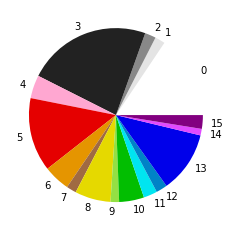

In [41]:
import matplotlib.pyplot as plt
import numpy as np

color_count = [tiles["color"].value_counts()[i] for i in range(16)]
color_count_array = np.array(color_count)
# colors https://lospec.com/palette-list/r-place
colors = ['#FFFFFF', '#E4E4E4', '#888888', '#222222', '#FFA7D1', '#E50000', '#E59500', '#A06A42', 
          '#E5D900', '#94E044', '#02BE01', '#00E5F0', '#0083C7', '#0000EA', '#E04AFF', '#820080']

plt.pie(color_count_array, labels=range(16), colors=colors)
plt.show() 


### What pixel was changed the most

In [71]:
most_used = tiles.value_counts(["x_coordinate", "y_coordinate"], sort=True, ).head().items()

type(most_used)

zip

['(999, 999)', '(0, 0)', '(998, 999)', '(775, 409)', '(999, 998)'] [37214, 9099, 8178, 7165, 6417]


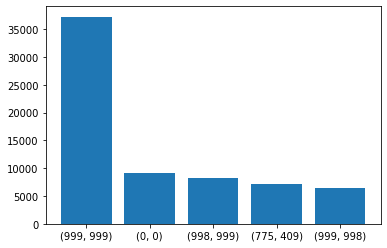

In [72]:
fig, ax = plt.subplots()
counts = []
coords = []
for coord, count in most_used:
    counts.append(count)
    coords.append(str(coord))
print(coords, counts)
plt.bar(coords,counts)
plt.show()

### Untouched pixels

In [95]:
tiles[["x_coordinate", "y_coordinate"]].drop_duplicates()

,x_coordinate,y_coordinate
0,326,258
1,190,791
2,1,753
3,233,931
4,526,663
...,...,...
16557855,317,606
16557874,955,166
16558250,648,466
16558928,996,184


In [96]:
all_tiles_set = set([(i, j) for i in range(1000) for j in range(1000)])
tiles_used_set = set(tiles.groupby(["x_coordinate", "y_coordinate"]).groups)
all_tiles_set.difference(tiles_used_set)

{(152, 246),
 (27, 889),
 (879, 611),
 (762, 700),
 (459, 699),
 (135, 687),
 (706, 396),
 (864, 604),
 (90, 801),
 (667, 584),
 (333, 150),
 (901, 491),
 (792, 584),
 (906, 606),
 (433, 911),
 (818, 493),
 (125, 386),
 (876, 434),
 (143, 812),
 (334, 151),
 (129, 685),
 (816, 303),
 (125, 651),
 (140, 285),
 (108, 598),
 (145, 220),
 (147, 818),
 (293, 872),
 (365, 223),
 (578, 367),
 (812, 305),
 (818, 614),
 (736, 395),
 (671, 186),
 (146, 301),
 (68, 790),
 (836, 253),
 (560, 584),
 (146, 975),
 (694, 398),
 (294, 873),
 (835, 294),
 (118, 876),
 (253, 692),
 (100, 599),
 (871, 476),
 (43, 882),
 (822, 620),
 (883, 450),
 (866, 626),
 (119, 877),
 (58, 867),
 (515, 697),
 (831, 296),
 (124, 812),
 (678, 166),
 (830, 480),
 (129, 927),
 (397, 678),
 (256, 702),
 (330, 279),
 (724, 398),
 (789, 564),
 (671, 163),
 (73, 882),
 (901, 625),
 (674, 168),
 (661, 643),
 (817, 253),
 (850, 250),
 (107, 880),
 (414, 888),
 (140, 648),
 (909, 601),
 (245, 441),
 (760, 249),
 (670, 584),
 (978